In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [ ]:
cifar10 = keras.datasets.cifar10
# Mengakses dataset CIFAR-10 (dataset klasifikasi gambar 10 kelas)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Memuat data training dan testing
# train_images: (50000, 32, 32, 3)
# train_labels: (50000, 1)


print(train_images.shape)
# Menampilkan dimensi data training

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
# Normalisasi nilai piksel dari range 0–255 menjadi 0–1
# Ini penting agar training CNN lebih stabil


class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
# Daftar nama kelas sesuai label CIFAR-10

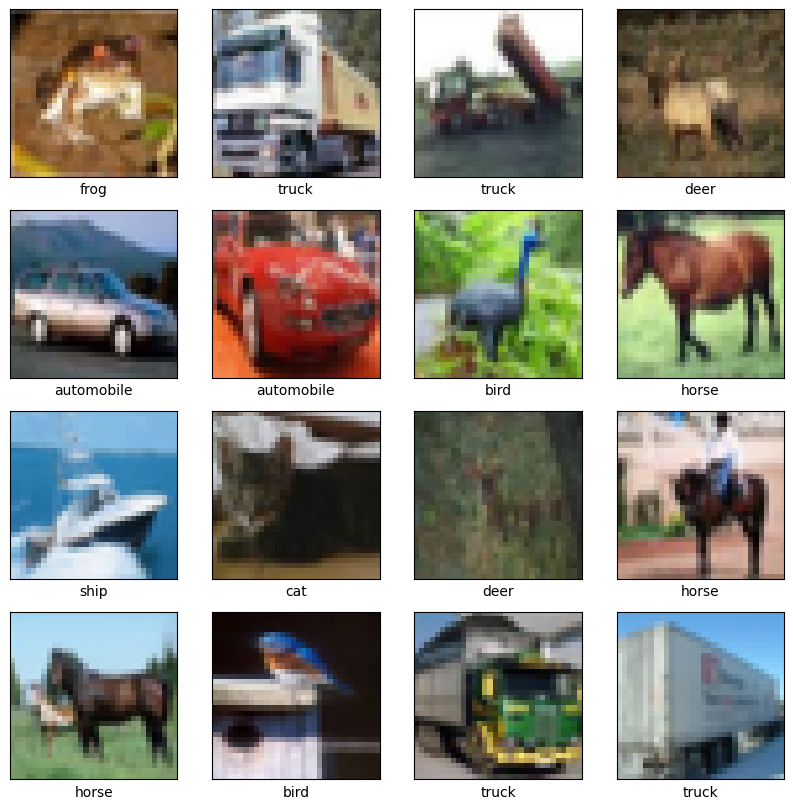

In [ ]:
def show():
  plt.figure(figsize=(10,10))
  # Membuat figure besar untuk menampilkan banyak gambar

  for i in range(16):
    plt.subplot(4,4,i+1)
    # Membuat grid 4x4

    plt.xticks([])
    plt.yticks([])
    # Menghilangkan angka pada sumbu

    plt.grid(False)
    # Menghilangkan grid

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Menampilkan gambar ke-i dari data training

    plt.xlabel(class_names[train_labels[i][0]])
    # Menampilkan label kelas di bawah gambar

  plt.show()
  # Menampilkan semua gambar


# show()
# (Komentar) Untuk menampilkan contoh gambar CIFAR-10

In [ ]:
model = keras.models.Sequential()
# Membuat model Sequential (layer disusun berurutan)

model.add(
    layers.Conv2D(
        32, (3,3),
        strides=(1,1),
        padding='valid',
        activation='relu',
        input_shape=(32,32,3)
    )
)
# Convolution layer pertama:
# - 32 filter
# - ukuran kernel 3x3
# - input gambar RGB 32x32x3
# - aktivasi ReLU

model.add(layers.MaxPooling2D((2,2)))
# Max pooling untuk mengurangi dimensi feature map


model.add(layers.Conv2D(32, 3, activation='relu'))
# Convolution layer kedua dengan 32 filter dan kernel 3x3

model.add(layers.MaxPooling2D((2,2)))
# Max pooling kedua


model.add(layers.Flatten())
# Mengubah feature map 3D menjadi vektor 1D

model.add(layers.Dense(64, activation='relu'))
# Fully connected (hidden layer) dengan 64 neuron

model.add(layers.Dense(10))
# Output layer dengan 10 neuron (satu untuk tiap kelas CIFAR-10)


print(model.summary())
# Menampilkan ringkasan arsitektur model dan jumlah parameter


loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Fungsi loss untuk klasifikasi multi-kelas
# from_logits=True karena output belum melalui Softmax

optim = keras.optimizers.Adam(learning_rate=0.001)
# Optimizer Adam dengan learning rate 0.001

metrics = ['accuracy']
# Metrik evaluasi yang digunakan adalah akurasi


model.compile(optimizer=optim, loss=loss, metrics=metrics)
# Mengonfigurasi model dengan loss, optimizer, dan metrik


batch_size = 64
# Jumlah data dalam satu batch training

epochs = 5
# Jumlah epoch (pengulangan training terhadap seluruh dataset)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,586 (330.41 KB)

 Trainable params: 84,586 (330.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)
# Melatih model CNN menggunakan data training

Epoch 1/5
782/782 - 46s - 59ms/step - accuracy: 0.4247 - loss: 1.5913
Epoch 2/5
782/782 - 83s - 106ms/step - accuracy: 0.5481 - loss: 1.2744
Epoch 3/5
782/782 - 47s - 60ms/step - accuracy: 0.5975 - loss: 1.1442
Epoch 4/5
782/782 - 79s - 101ms/step - accuracy: 0.6272 - loss: 1.0605
Epoch 5/5
782/782 - 44s - 57ms/step - accuracy: 0.6536 - loss: 0.9953


In [ ]:
model.evaluate(
    test_images,
    test_labels,
    batch_size=batch_size,
    verbose=2
)
# Mengevaluasi performa model menggunakan data testing

157/157 - 2s - 16ms/step - accuracy: 0.6342 - loss: 1.0439


[1.0438843965530396, 0.6341999769210815]

In [ ]:
# ============================================================
# Ringkasan:
# Kode ini membangun dan melatih model Convolutional Neural Network (CNN)
# untuk klasifikasi gambar CIFAR-10 (10 kelas objek).
#
# Alur utama kode:
# 1. Memuat dan menormalisasi dataset CIFAR-10
# 2. (Opsional) Menampilkan contoh gambar dan label
# 3. Membangun CNN dengan Conv2D, MaxPooling, dan Dense layer
# 4. Mengonfigurasi model dengan loss klasifikasi dan optimizer Adam
# 5. Melatih model menggunakan data training
# 6. Mengevaluasi akurasi model pada data testing
#
# Model ini merupakan contoh dasar CNN untuk image classification
# dan fondasi sebelum masuk ke arsitektur yang lebih kompleks.
# ============================================================

In [ ]:
# ============================================================
# RINGKASAN PEMAHAMAN CNN (Conv2D) – INPUT, FILTER, & LAYER
# ============================================================

# input_shape=(32, 32, 3)
# --------------------------------
# Artinya layer convolutional pertama menerima:
# - gambar berukuran 32 x 32 piksel
# - dengan 3 channel warna (RGB)
#
# BUKAN berarti neuron berukuran 32x32,
# tetapi sebuah tensor input dengan format (height, width, channels).

# ============================================================

# layers.Conv2D(32, (3,3), activation='relu')
# --------------------------------
# Angka 32 = jumlah filter / kernel
# Artinya:
# - ada 32 filter berbeda
# - masing-masing filter mengekstrak pola yang berbeda dari gambar
# - output-nya adalah 32 feature maps
#
# Setiap filter memiliki ukuran:
# 3 x 3 x 3  (karena input RGB memiliki 3 channel)

# ============================================================

# activation='relu'
# --------------------------------
# Setelah operasi konvolusi:
# - hasil feature map dilewatkan ke fungsi ReLU
# - nilai negatif diubah menjadi 0
#
# ReLU membantu:
# - non-linearitas
# - mempercepat training
# - mengurangi masalah vanishing gradient

# ============================================================

# Kenapa Conv2D kedua tidak butuh input_shape?
# --------------------------------
# Hanya layer pertama yang memerlukan input_shape.
#
# Layer berikutnya otomatis menerima input
# dari output layer sebelumnya.
#
# Contoh:
# - Output Conv2D pertama: (30, 30, 32)
# - Conv2D kedua otomatis menerima shape ini
# tanpa perlu dituliskan ulang.

# ============================================================

# Perbedaan Dense vs Conv2D
# --------------------------------
# Dense:
# - setiap neuron terhubung ke semua input
# - cocok untuk data tabular
#
# Conv2D:
# - menggunakan kernel kecil (misal 3x3)
# - bekerja secara spasial (lokal)
# - cocok untuk gambar
#
# CNN mengekstrak fitur bertahap:
# - edge → texture → object part → object

# ============================================================
# KESIMPULAN
# ============================================================
# Conv2D tidak menghasilkan "neuron" tunggal,
# tetapi feature maps.
#
# Conv2D(32, ...) berarti:
# "Saya ingin 32 cara berbeda untuk melihat pola di gambar"
#
# CNN bekerja dengan:
# - filter
# - sliding window
# - feature extraction bertingkat


In [ ]:
# ============================================================
# HYPERPARAMETER CNN YANG DAPAT DITUNING
# ============================================================

# 1. Jumlah filter (Conv2D)
#    Contoh: 16, 32, 64, 128
#    Semakin besar → semakin banyak fitur, tapi lebih berat komputasi

# 2. Ukuran kernel
#    Contoh: (3,3), (5,5)
#    Kernel kecil → lebih detail, kernel besar → konteks lebih luas

# 3. Strides
#    Contoh: (1,1), (2,2)
#    Stride besar → output lebih kecil, komputasi lebih ringan

# 4. Padding
#    'valid' → ukuran output mengecil
#    'same'  → ukuran output sama dengan input

# 5. Activation function
#    Contoh:
#    - relu (paling umum)
#    - leaky_relu
#    - elu

# 6. Pooling type & size
#    MaxPooling2D vs AveragePooling2D
#    Ukuran pooling: (2,2), (3,3)

# 7. Jumlah convolutional layer
#    Lebih banyak layer → fitur lebih kompleks
#    Tapi rawan overfitting

# 8. Jumlah Dense layer & neuron
#    Contoh: Dense(64), Dense(128)

# 9. Learning rate optimizer
#    Contoh:
#    - 0.1 (cepat tapi tidak stabil)
#    - 0.001 (umum & stabil)

# 10. Batch size
#     Contoh: 32, 64, 128
#     Batch besar → training stabil, butuh memori besar

# 11. Epoch
#     Jumlah iterasi training

# 12. Regularization
#     - Dropout
#     - L2 weight decay
#
#     Digunakan untuk mencegah overfitting
